# Plotting for Exploratory data analysis (EDA)

# Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## 1. Load Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#Load haberman.csv into a pandas dataFrame.
haberman= pd.read_csv("haberman.csv")



In [2]:
print (haberman.shape)

(306, 4)


In [3]:

print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:

haberman["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

### Obeservation(s):

1. This data set has 306 data points and 4 features.
2. 3 features are indipendent variables such as 'age', 'year' and 'nodes'.
3. 'Status' is the dependent variable.
4. This dataset is imbalanced dataset because 73.5% datapoints belongs to status 1 and rest belongs ro status 2.
5. According to haberman dataset description status 1 is survived more than 5 years after operation and status 2 means died with    in 5 years.

## 2. 2-D Scatter Plot

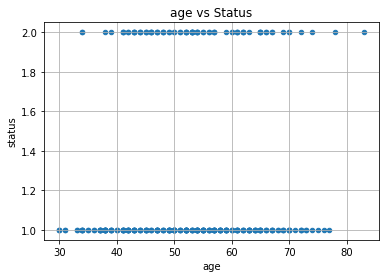

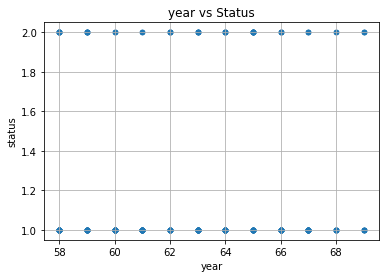

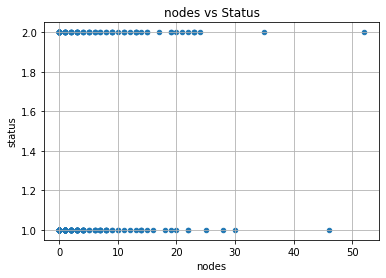

In [5]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.
columns=haberman.columns[:3]
for i in columns:
    haberman.plot(kind='scatter', x=i, y='status',grid=True)
    plt.title("{} vs Status".format(i))
    plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

### Observation(s):

1. According to scatter plot between status and age, if patient's age is more than 78 years then patient died with in 5 years      and if age is less than 34 patient have survived more than 5 years after the operation.
2. According to scatter plot between status and nodes, if patient has more than 46 positive nodes then patient died with in 5      years.

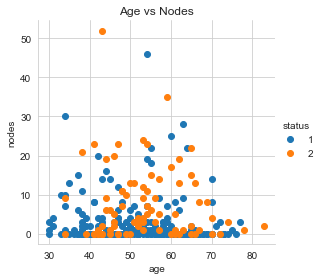

In [6]:

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4).set(title= "Age vs Nodes") \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();


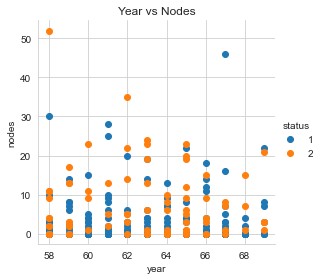

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4).set(title= "Year vs Nodes") \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

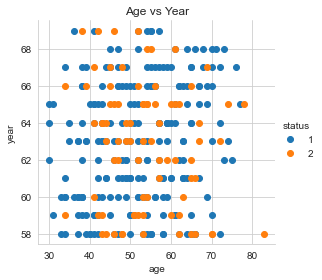

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4).set(title= 'Age vs Year') \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

### Observation(s):

1. It is harder to seperate status_1 from status_2 because status_1 and status_2 have overlapped in all above 3 plots.

## 3.Pair-plot

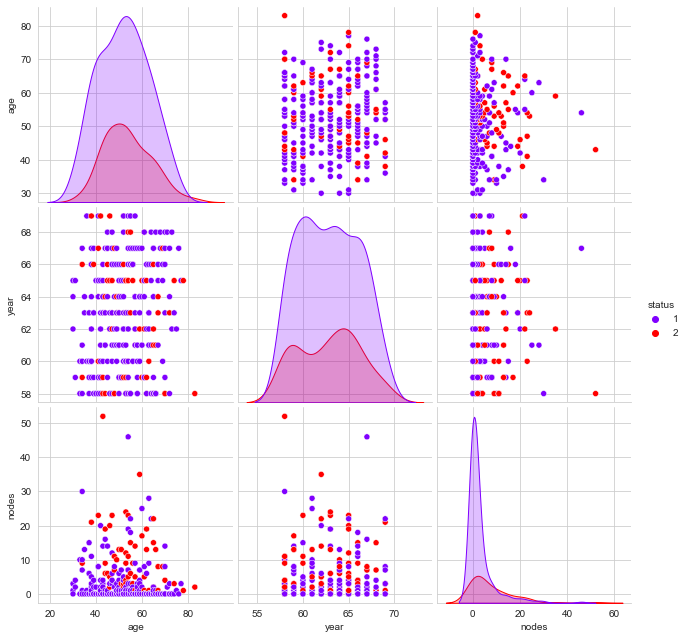

In [9]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", palette="rainbow",size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

### Observation(s):

1. This pairplot is also not useful to seperate status_1 from status_2.

## 4. Histogram, PDF, CDF

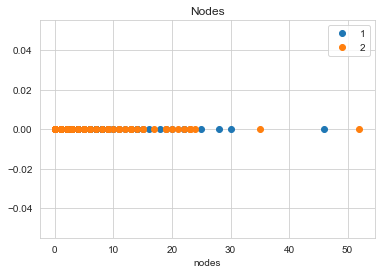

In [10]:
import numpy as np
status_1 = haberman.loc[haberman["status"] == 1];
status_2 = haberman.loc[haberman["status"] == 2];
#print(iris_setosa["petal_length"])
plt.plot(status_1["nodes"], np.zeros_like(status_1['nodes']), 'o')
plt.plot(status_2["nodes"], np.zeros_like(status_2['nodes']), 'o')
plt.title("Nodes")
plt.xlabel("nodes")
plt.legend(['1','2'])
plt.show()


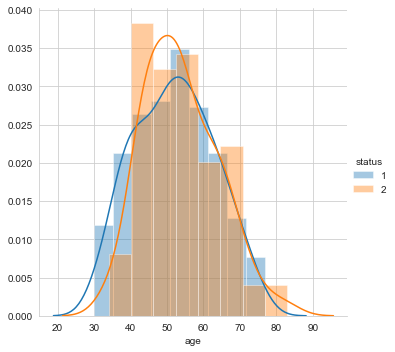

In [11]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



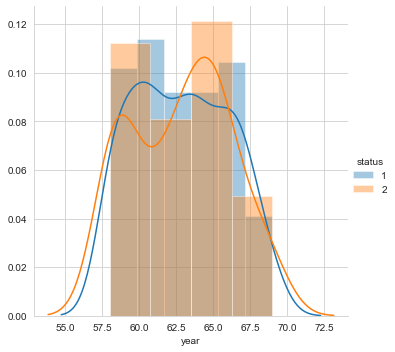

In [12]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

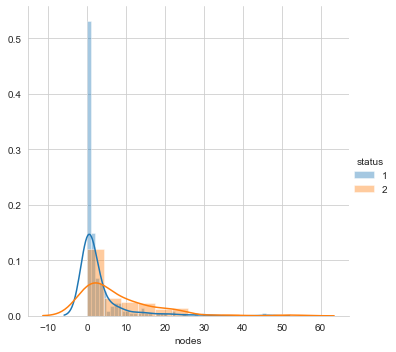

In [13]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

### Obeservation(s):

1. According to nodes histogram most of patients have survived more than 5 years who has zero axillary nodes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


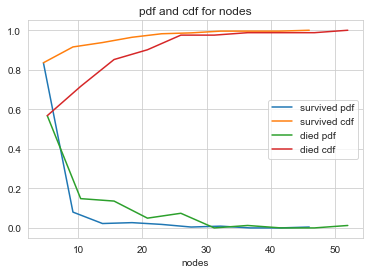

In [14]:
counts, bin_edges = np.histogram(status_1['nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(status_2['nodes'], bins=10,
                                  density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("nodes")
plt.legend(['survived pdf', 'survived cdf', 'died pdf','died cdf'])
plt.title('pdf and cdf for nodes')
plt.show();


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


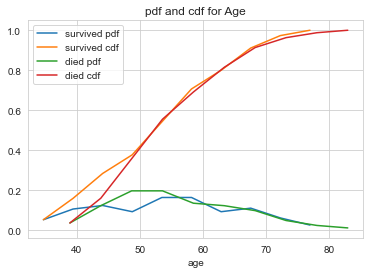

In [15]:
counts, bin_edges = np.histogram(status_1['age'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(status_2['age'], bins=10,
                                  density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.legend(['survived pdf', 'survived cdf', 'died pdf','died cdf'])
plt.title('pdf and cdf for Age')
plt.show();

## 5. Describing the Data

In [16]:
haberman_survived = haberman[haberman["status"] == 1]
print ("Summary of patients who are survived more than 5 years:")
haberman_survived.describe()


Summary of patients who are survived more than 5 years:


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [17]:
haberman_died = haberman[haberman["status"] == 2]
print ("Summary of patients who are died within 5 years:")
haberman_died.describe()

Summary of patients who are died within 5 years:


,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


## 6.Box plot and Whiskers

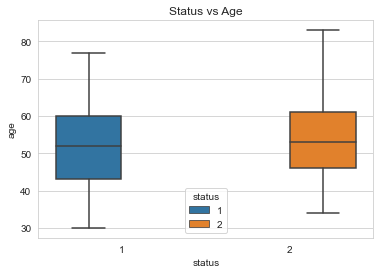

In [18]:

sns.boxplot(x='status',y='age', data=haberman, hue= "status").set(title= "Status vs Age")
plt.show()

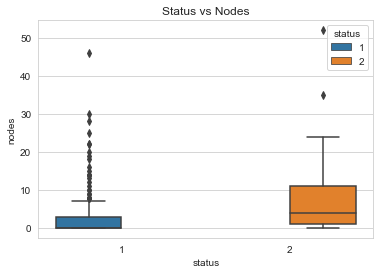

In [19]:
sns.boxplot(x='status',y='nodes', data=haberman, hue= "status").set(title= "Status vs Nodes")
plt.show()

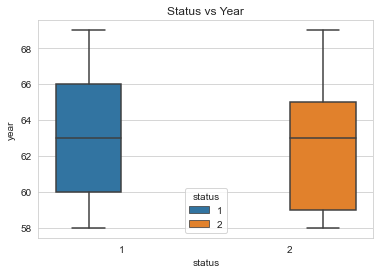

In [20]:
sns.boxplot(x='status',y='year', data=haberman, hue= "status").set(title= "Status vs Year")
plt.show()

## 7.Violin plots

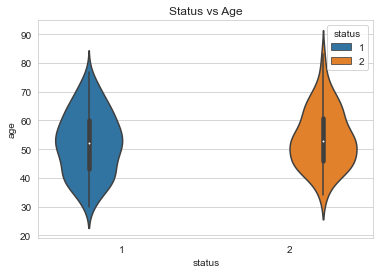

In [21]:

sns.violinplot(x="status", y="age", data=haberman, hue= "status",size=8).set(title= "Status vs Age")
plt.show()

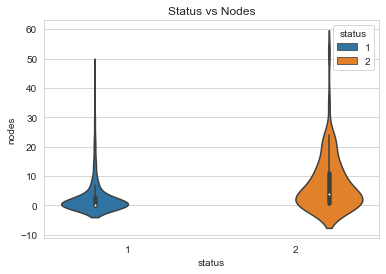

In [22]:
sns.violinplot(x="status", y="nodes", data=haberman, hue= "status",size=8).set(title= "Status vs Nodes")
plt.show()

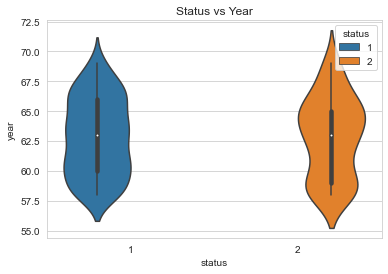

In [23]:
sns.violinplot(x="status", y="year", data=haberman, hue= "status",size=8).set(title= "Status vs Year")
plt.show()

## 8. Joint plots

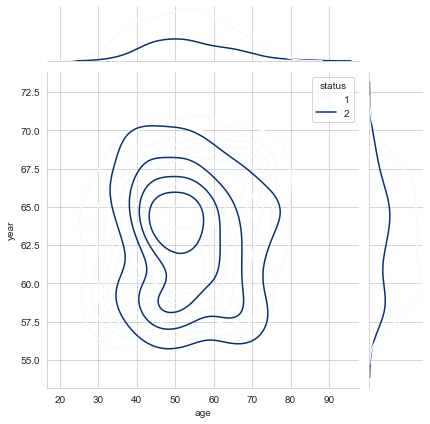

In [24]:
sns.jointplot(x="age", y="year",hue="status", data=haberman, kind='kde',palette= "Blues")
plt.show()


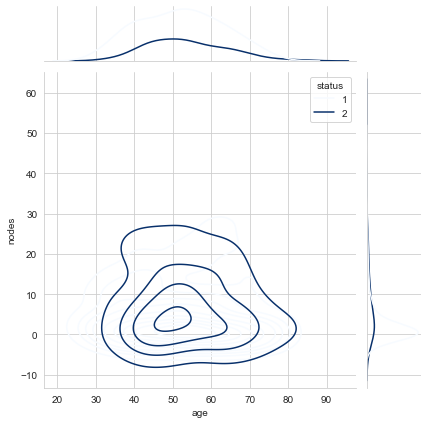

In [25]:
sns.jointplot(x="age", y="nodes",hue="status", data=haberman, kind='kde',palette= "Blues")
plt.show()

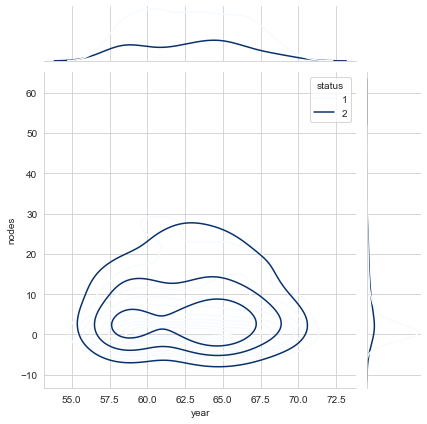

In [26]:
sns.jointplot(x="year", y="nodes",hue="status", data=haberman, kind='kde',palette= "Blues")
plt.show()

### Observation(s):

1. 77% of patients who got surgery age between 40 to 68.
2. 73.5% of patients are survived more than 5 years after surgery.
3. 76% of patients have detected 0 to 5 positive axillary nodes.
4. Patient died within 5 years after the surgery who's age is more than 78 years. And Patient survived after the surgery who's      age is less than 34 years. 
5. Patient died with in 5 years who has more than 46 positive axillary nodes.

### References:

https://www.kaggle.com/gilsousa/habermans-survival-data-set